In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('xAPI-Edu-Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [3]:
len(df)

480

In [4]:
df.isna().sum()/len(df)*100

gender                      0.0
NationalITy                 0.0
PlaceofBirth                0.0
StageID                     0.0
GradeID                     0.0
SectionID                   0.0
Topic                       0.0
Semester                    0.0
Relation                    0.0
raisedhands                 0.0
VisITedResources            0.0
AnnouncementsView           0.0
Discussion                  0.0
ParentAnsweringSurvey       0.0
ParentschoolSatisfaction    0.0
StudentAbsenceDays          0.0
Class                       0.0
dtype: float64

In [5]:
obj=list(df.select_dtypes(include='object').columns)
obj

['gender',
 'NationalITy',
 'PlaceofBirth',
 'StageID',
 'GradeID',
 'SectionID',
 'Topic',
 'Semester',
 'Relation',
 'ParentAnsweringSurvey',
 'ParentschoolSatisfaction',
 'StudentAbsenceDays',
 'Class']

In [6]:
df.select_dtypes(exclude='object').columns

Index(['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion'], dtype='object')

In [7]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


ValueError: num must be 1 <= num <= 12, not 13

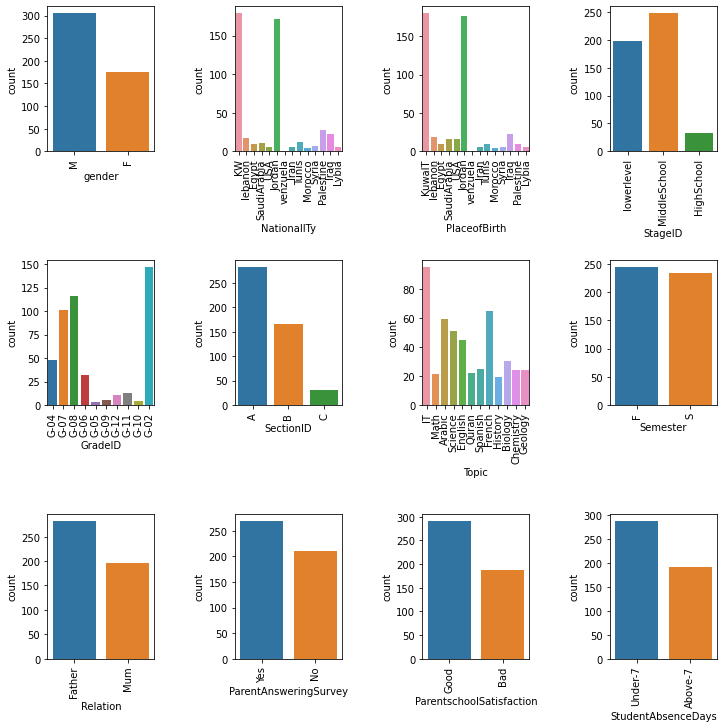

In [8]:
plt.figure(figsize=(12,12))
plt.subplots_adjust(wspace=0.75,hspace=0.75)

for i in range(len(obj)):
    plt.subplot(3,4,i+1)
    plt.xticks(rotation=90)
    sns.countplot(df[obj[i]])

In [9]:
df['Topic'].value_counts()

IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64

In [10]:
x=df.groupby(by='Class').agg(raisehands=('raisedhands','mean'),
                            Resources=('VisITedResources','mean'),
                            Discussion=('Discussion','mean'),
                            Announcements=('AnnouncementsView','mean'))
print(x)

       raisehands  Resources  Discussion  Announcements
Class                                                  
H       70.288732  78.746479   53.661972      53.380282
L       16.889764  18.322835   30.834646      15.574803
M       48.938389  60.635071   43.791469      40.962085


Text(0.5, 1.0, 'Class versus mean raised hands')

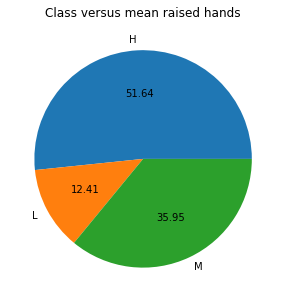

In [11]:
plt.figure(figsize=(5,5))
plt.pie(x=x['raisehands'].values,labels=x.index,autopct='%.2f')
plt.title('Class versus mean raised hands')

<AxesSubplot:xlabel='Class', ylabel='Discussion'>

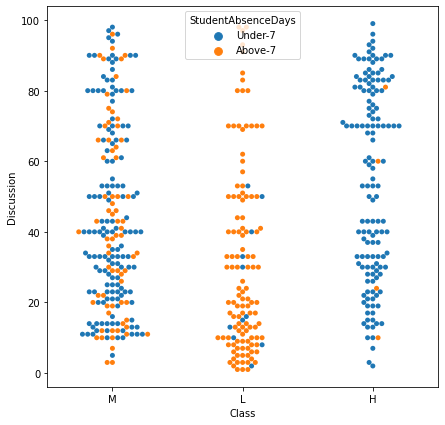

In [12]:
plt.figure(figsize=(7,7))

sns.swarmplot(x=df['Class'],y=df['Discussion'],hue=df['StudentAbsenceDays'])

<AxesSubplot:xlabel='Class', ylabel='VisITedResources'>

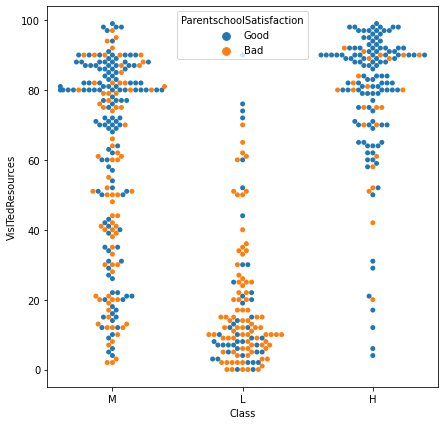

In [13]:
plt.figure(figsize=(7,7))

sns.swarmplot(x=df['Class'],y=df['VisITedResources'],hue=df['ParentschoolSatisfaction'])

In [14]:
print(df[(df['Topic']=='IT') & (df['Class']=='H')])
print(df[(df['Topic']=='IT') & (df['Class']=='M')])
print(df[df['Topic']=='IT'])

    gender  NationalITy PlaceofBirth       StageID GradeID SectionID Topic  \
19       M           KW       KuwaIT  MiddleSchool    G-07         B    IT   
62       M     venzuela     venzuela    HighSchool    G-10         A    IT   
68       F          USA          USA    HighSchool    G-12         A    IT   
84       M           KW       KuwaIT    lowerlevel    G-02         B    IT   
86       M  SaudiArabia  SaudiArabia    lowerlevel    G-02         B    IT   
91       M           KW       KuwaIT    lowerlevel    G-02         B    IT   
92       F           KW       KuwaIT    lowerlevel    G-02         B    IT   
93       M          USA          USA    lowerlevel    G-02         B    IT   
95       F           KW       KuwaIT    lowerlevel    G-02         B    IT   
96       F           KW       KuwaIT    lowerlevel    G-02         C    IT   
101      F           KW       KuwaIT    lowerlevel    G-02         B    IT   
107      M           KW       KuwaIT    lowerlevel    G-02      

In [15]:
a=len(df[(df['Topic']=='IT') & (df['Class']=='H')])

b=len(df[(df['Topic']=='IT') & (df['Class']=='M')])

c=len(df[df['Topic']=='IT'])

print(a,b,c)

print((a+b)/c*100)

15 42 95
60.0


In [16]:
df=pd.read_csv('xAPI-Edu-Data.csv')

['IT', 'French', 'Arabic', 'Science', 'English', 'Biology', 'Spanish', 'Chemistry', 'Geology', 'Quran', 'Math', 'History']
[60.0, 75.38461538461539, 71.1864406779661, 80.3921568627451, 77.77777777777779, 86.66666666666667, 68.0, 66.66666666666666, 100.0, 72.72727272727273, 66.66666666666666, 84.21052631578947]


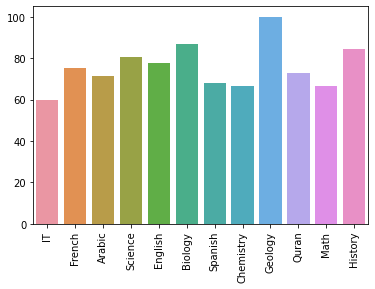

In [17]:
d=[]
e=[]
for i in df['Topic'].value_counts().index:
    a=len(df[(df['Topic']==i) & (df['Class']=='H')])

    b=len(df[(df['Topic']==i) & (df['Class']=='M')])

    c=len(df[df['Topic']==i])

    d. append(i)
    
    e.append((a+b)/c*100)
    
print(d)
print(e)

sns.barplot(x=d,y=e)

plt.xticks(rotation=90)

plt.show()

['IT', 'French', 'Arabic', 'Science', 'English', 'Biology', 'Spanish', 'Chemistry', 'Geology', 'Quran', 'Math', 'History']
[15.789473684210526, 30.76923076923077, 32.20338983050847, 31.372549019607842, 37.77777777777778, 53.333333333333336, 20.0, 41.66666666666667, 25.0, 36.36363636363637, 28.57142857142857, 21.052631578947366]


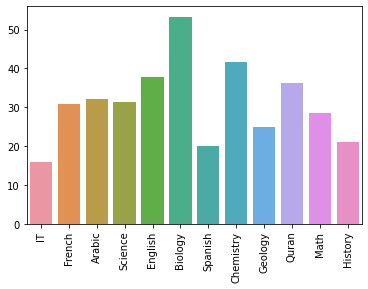

In [18]:
d=[]
e=[]
for i in df['Topic'].value_counts().index:
    a=len(df[(df['Topic']==i) & (df['Class']=='H')])

    # b=len(df[(df['Topic']==i) & (df['Class']=='M')])

    c=len(df[df['Topic']==i])

    d. append(i)
    
    e.append(a/c*100)
    
print(d)
print(e)

sns.barplot(x=d,y=e)

plt.xticks(rotation=90)

plt.show()

In [19]:
a=len(df[(df['ParentschoolSatisfaction']=='Good') & (df['Class']=='H')])

c=len(df[df['ParentschoolSatisfaction']=='Good'])

print(a,c)

print(a/c*100)

118 292
40.41095890410959


['Good', 'Bad']
[40.41095890410959, 12.76595744680851]


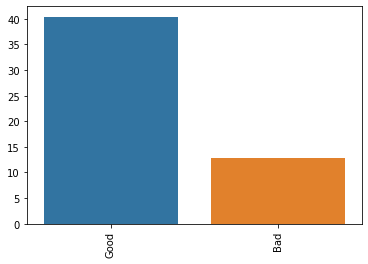

In [20]:
d=[]
e=[]
for i in df['ParentschoolSatisfaction'].value_counts().index:
    a=len(df[(df['ParentschoolSatisfaction']==i) & (df['Class']=='H')])

    # b=len(df[(df['Topic']==i) & (df['Class']=='M')])

    c=len(df[df['ParentschoolSatisfaction']==i])

    d. append(i)
    
    e.append(a/c*100)
    
print(d)
print(e)

sns.barplot(x=d,y=e)

plt.xticks(rotation=90)

plt.show()

['Under-7', 'Above-7']
[47.75086505190311, 2.094240837696335]


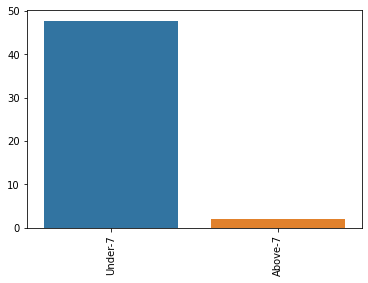

In [21]:
d=[]
e=[]
for i in df['StudentAbsenceDays'].value_counts().index:
    a=len(df[(df['StudentAbsenceDays']==i) & (df['Class']=='H')])

    # b=len(df[(df['Topic']==i) & (df['Class']=='M')])

    c=len(df[df['StudentAbsenceDays']==i])

    d. append(i)
    
    e.append(a/c*100)
    
print(d)
print(e)

sns.barplot(x=d,y=e)

plt.xticks(rotation=90)

plt.show()

In [22]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [23]:
df1=df.copy()

In [24]:
df1.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [25]:
df1.drop(columns=['NationalITy', 'PlaceofBirth' , 'SectionID'] ,axis=1, inplace=True)

In [26]:
df1.head()

,gender,StageID,GradeID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,lowerlevel,G-04,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,lowerlevel,G-04,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,lowerlevel,G-04,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,lowerlevel,G-04,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,lowerlevel,G-04,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


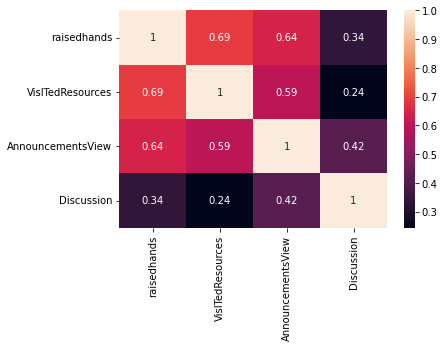

In [27]:
sns.heatmap(df1.corr(), annot=True)
plt.show()

In [28]:
cols=[i for i in df1.columns if df[i].dtype==object]
cols.pop(-1)
cols

['gender',
 'StageID',
 'GradeID',
 'Topic',
 'Semester',
 'Relation',
 'ParentAnsweringSurvey',
 'ParentschoolSatisfaction',
 'StudentAbsenceDays']

In [29]:
df1=pd.get_dummies(df1,columns=cols,drop_first=True)
df1.head(5)

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_M,StageID_MiddleSchool,StageID_lowerlevel,GradeID_G-04,GradeID_G-05,...,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,15,16,2,20,M,1,0,1,1,0,...,1,0,0,0,0,0,0,1,1,1
1,20,20,3,25,M,1,0,1,1,0,...,1,0,0,0,0,0,0,1,1,1
2,10,7,0,30,L,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
3,30,25,5,35,L,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
4,40,50,12,50,M,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0


In [30]:
df1['Class']=df1['Class'].replace({'L':0, 'M':1, 'H':2})
df1.head(2)

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_M,StageID_MiddleSchool,StageID_lowerlevel,GradeID_G-04,GradeID_G-05,...,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,15,16,2,20,1,1,0,1,1,0,...,1,0,0,0,0,0,0,1,1,1
1,20,20,3,25,1,1,0,1,1,0,...,1,0,0,0,0,0,0,1,1,1


In [31]:
x=df1.drop('Class',axis=1)
y=df1['Class']

In [32]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77)

In [33]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [34]:
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [36]:
classifier=LogisticRegression()

In [37]:
lr=classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_pred_train=classifier.predict(x_train)

In [38]:
print('For test data')
print(classification_report(y_test,y_pred))

For test data
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        24
           1       0.78      0.77      0.77        47
           2       0.75      0.72      0.73        25

    accuracy                           0.78        96
   macro avg       0.78      0.79      0.78        96
weighted avg       0.78      0.78      0.78        96



In [39]:
print('For train data')
print(classification_report(y_train,y_pred_train))

For train data
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       103
           1       0.85      0.81      0.83       164
           2       0.82      0.86      0.84       117

    accuracy                           0.86       384
   macro avg       0.86      0.87      0.86       384
weighted avg       0.86      0.86      0.86       384



In [40]:
from sklearn.tree import DecisionTreeClassifier
classifier2=DecisionTreeClassifier(random_state=77,max_depth=10,max_leaf_nodes=7,criterion='entropy')

In [41]:
dt=classifier2.fit(x_train,y_train)
y_pred=classifier2.predict(x_test)
y_pred_train=classifier2.predict(x_train)

In [42]:
print('For test data')
print(classification_report(y_test,y_pred))
print('For train data')
print(classification_report(y_train,y_pred_train))

For test data
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        24
           1       0.69      0.57      0.63        47
           2       0.58      0.76      0.66        25

    accuracy                           0.67        96
   macro avg       0.67      0.69      0.68        96
weighted avg       0.68      0.67      0.67        96

For train data
              precision    recall  f1-score   support

           0       0.93      0.81      0.86       103
           1       0.78      0.57      0.65       164
           2       0.62      0.93      0.75       117

    accuracy                           0.74       384
   macro avg       0.78      0.77      0.76       384
weighted avg       0.77      0.74      0.74       384



In [43]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':[2,3,4,5,6,8,10,14,16], 'criterion':['gini','entropy'],
             'max_leaf_nodes':[2,5,10,15,20,25,30],'min_samples_split':[10,20,30,40]}
dt1=DecisionTreeClassifier(random_state=77)
grid=GridSearchCV(dt1,param_grid,cv=10)
grid.fit(x_train,y_train)
grid.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_leaf_nodes': 30,
 'min_samples_split': 10}

In [47]:
classifier3=DecisionTreeClassifier(random_state=77,max_depth=8,max_leaf_nodes=30,criterion='gini',min_samples_split=10)
dt=classifier3.fit(x_train,y_train)
y_pred=classifier3.predict(x_test)
y_pred_train=classifier3.predict(x_train)
print('For test data')
print(classification_report(y_test,y_pred))
print('For train data')
print(classification_report(y_train,y_pred_train))

For test data
              precision    recall  f1-score   support

           0       0.70      0.88      0.78        24
           1       0.69      0.72      0.71        47
           2       0.71      0.48      0.57        25

    accuracy                           0.70        96
   macro avg       0.70      0.69      0.69        96
weighted avg       0.70      0.70      0.69        96

For train data
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       103
           1       0.86      0.87      0.86       164
           2       0.87      0.82      0.85       117

    accuracy                           0.88       384
   macro avg       0.88      0.88      0.88       384
weighted avg       0.87      0.88      0.87       384



In [48]:
from sklearn.ensemble import RandomForestClassifier
classifier4=RandomForestClassifier(random_state=77,max_depth=20,max_leaf_nodes=30,criterion='gini',n_estimators=30)
rf=classifier4.fit(x_train,y_train)
y_pred=classifier4.predict(x_test)
y_pred_train=classifier4.predict(x_train)
print('For test data')
print(classification_report(y_test,y_pred))
print('For train data')
print(classification_report(y_train,y_pred_train))

For test data
              precision    recall  f1-score   support

           0       0.76      0.79      0.78        24
           1       0.70      0.81      0.75        47
           2       0.82      0.56      0.67        25

    accuracy                           0.74        96
   macro avg       0.76      0.72      0.73        96
weighted avg       0.75      0.74      0.74        96

For train data
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       103
           1       0.90      0.93      0.91       164
           2       0.95      0.90      0.92       117

    accuracy                           0.92       384
   macro avg       0.93      0.93      0.93       384
weighted avg       0.93      0.92      0.92       384



In [49]:
param_grid = {'max_depth':[2,3,4,6,8,10,12,17,19],'criterion':['gini','entropy'],
              'max_leaf_nodes':[5,10,15,20,25,30,35], 'n_estimators':[10,20,30,40,50]}
rf1 = RandomForestClassifier(random_state=77)
grid = GridSearchCV(rf1,param_grid,cv=10)
grid.fit(x_train,y_train)
grid.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_leaf_nodes': 30,
 'n_estimators': 50}

In [50]:
classifier5=RandomForestClassifier(random_state=77,max_depth=12,max_leaf_nodes=30,criterion='gini',n_estimators=50)
rf=classifier5.fit(x_train,y_train)
y_pred=classifier5.predict(x_test)
y_pred_train=classifier5.predict(x_train)
print('For test data')
print(classification_report(y_test,y_pred))
print('For train data')
print(classification_report(y_train,y_pred_train))

For test data
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        24
           1       0.72      0.81      0.76        47
           2       0.79      0.60      0.68        25

    accuracy                           0.75        96
   macro avg       0.77      0.73      0.74        96
weighted avg       0.75      0.75      0.75        96

For train data
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       103
           1       0.90      0.93      0.91       164
           2       0.95      0.90      0.92       117

    accuracy                           0.92       384
   macro avg       0.93      0.93      0.93       384
weighted avg       0.93      0.92      0.92       384



In [51]:
from sklearn.svm import SVC
svc= SVC(random_state=5)
SVM = svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
y_pred_train = svc.predict(x_train)

In [52]:
print('For test data')
print(classification_report(y_test,y_pred))
print('For train data')
print(classification_report(y_train,y_pred_train))

For test data
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        24
           1       0.73      0.79      0.76        47
           2       0.76      0.64      0.70        25

    accuracy                           0.75        96
   macro avg       0.76      0.74      0.75        96
weighted avg       0.75      0.75      0.75        96

For train data
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       103
           1       0.82      0.86      0.84       164
           2       0.85      0.84      0.84       117

    accuracy                           0.86       384
   macro avg       0.87      0.86      0.87       384
weighted avg       0.86      0.86      0.86       384



In [55]:
param_grid = {'C':[0.1,1,10,20,30],'gamma':[1,0.01,.1,.5,.005,.05,.75],'kernel':['rbf','poly','linear']}
sv = SVC(random_state=77)
grid = GridSearchCV(sv,param_grid,cv=10)
grid.fit(x_train,y_train)
grid.best_params_

{'C': 30, 'gamma': 0.005, 'kernel': 'rbf'}

In [59]:
svc=SVC(random_state=5,C=30,gamma=0.005,kernel='rbf')
SVM = svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
y_pred_train = svc.predict(x_train)

In [60]:
print('For test data')
print(classification_report(y_test,y_pred))
print('For train data')
print(classification_report(y_train,y_pred_train))

For test data
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        24
           1       0.76      0.79      0.77        47
           2       0.73      0.64      0.68        25

    accuracy                           0.77        96
   macro avg       0.77      0.77      0.77        96
weighted avg       0.77      0.77      0.77        96

For train data
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       103
           1       0.89      0.86      0.87       164
           2       0.86      0.89      0.87       117

    accuracy                           0.89       384
   macro avg       0.89      0.90      0.89       384
weighted avg       0.89      0.89      0.89       384



In [67]:
from sklearn.naive_bayes import GaussianNB

In [69]:
nb= GaussianNB()
nb1= nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)
y_pred_train = nb.predict(x_train)
print('For test data')
print(classification_report(y_test,y_pred))
print('For train data')
print(classification_report(y_train,y_pred_train))

For test data
              precision    recall  f1-score   support

           0       0.54      0.88      0.67        24
           1       0.79      0.23      0.36        47
           2       0.51      0.88      0.65        25

    accuracy                           0.56        96
   macro avg       0.61      0.66      0.56        96
weighted avg       0.65      0.56      0.51        96

For train data
              precision    recall  f1-score   support

           0       0.64      0.95      0.77       103
           1       0.83      0.18      0.30       164
           2       0.57      0.95      0.71       117

    accuracy                           0.62       384
   macro avg       0.68      0.69      0.59       384
weighted avg       0.70      0.62      0.55       384



In [72]:
from sklearn.ensemble import AdaBoostClassifier
abcd = AdaBoostClassifier(random_state =7)
ABCD = abcd.fit(x_train,y_train)
y_pred = abcd.predict(x_test)
y_pred_train = abcd.predict(x_train)
print('For test data')
print(classification_report(y_test,y_pred))
print('for train data')
print(classification_report(y_train,y_pred_train))

For test data
              precision    recall  f1-score   support

           0       0.81      0.71      0.76        24
           1       0.61      0.66      0.63        47
           2       0.50      0.48      0.49        25

    accuracy                           0.62        96
   macro avg       0.64      0.62      0.63        96
weighted avg       0.63      0.62      0.63        96

for train data
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       103
           1       0.67      0.66      0.66       164
           2       0.60      0.64      0.62       117

    accuracy                           0.71       384
   macro avg       0.73      0.72      0.72       384
weighted avg       0.71      0.71      0.71       384



In [75]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=7,n_estimators=50,max_depth=20,max_features=20)

gbc=GBC.fit(x_train,y_train)
y_pred = GBC.predict(x_test)
y_pred_train = GBC.predict(x_train)
print('For test data')
print(classification_report(y_test,y_pred))
print('for train data')
print(classification_report(y_train,y_pred_train))


For test data
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        24
           1       0.71      0.72      0.72        47
           2       0.64      0.56      0.60        25

    accuracy                           0.72        96
   macro avg       0.72      0.72      0.72        96
weighted avg       0.71      0.72      0.72        96

for train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       164
           2       1.00      1.00      1.00       117

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384



In [94]:

from xgboost import XGBClassifier
XGB = XGBClassifier(n_estimators=50 ,max_depth=15 )
xgb=XGB.fit(x_train,y_train)
y_pred = XGB.predict(x_test)
y_pred_train = XGB.predict(x_train)
print('For test data')
print(classification_report(y_test,y_pred))
print('for train data')
print(classification_report(y_train,y_pred_train))


For test data
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.73      0.68      0.70        47
           2       0.65      0.68      0.67        25

    accuracy                           0.72        96
   macro avg       0.72      0.73      0.72        96
weighted avg       0.72      0.72      0.72        96

for train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       164
           2       1.00      1.00      1.00       117

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384



In [98]:
param_grid = {'n_estimators':[10,20,30,40,50],'max_depth':[5,10,15,20,25,30,35]}
xgb= XGBClassifier()
grid = GridSearchCV(xgb,param_grid,cv=10)
grid.fit(x_train,y_train)
grid.best_params_

{'max_depth': 20, 'n_estimators': 40}

In [99]:
XGB = XGBClassifier(n_estimators=40 ,max_depth=20 )
xgb=XGB.fit(x_train,y_train)
y_pred = XGB.predict(x_test)
y_pred_train = XGB.predict(x_train)
print('For test data')
print(classification_report(y_test,y_pred))
print('for train data')
print(classification_report(y_train,y_pred_train))


For test data
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.74      0.74      0.74        47
           2       0.74      0.68      0.71        25

    accuracy                           0.75        96
   macro avg       0.75      0.75      0.75        96
weighted avg       0.75      0.75      0.75        96

for train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       164
           2       1.00      1.00      1.00       117

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384

